## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).

In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6b09577852a1cc3d337b43a2aedf1b3c59f1768a4bdc4c4426f2a48b45f65bb0
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.sql.window import Window
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [ ]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Your Code 
df = spark.read.csv('2020T2Data.csv', header = True, inferSchema = True) 
df.show(5)

+------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+--------+-------+-------+--------------+------------------------+---------+-----------+--------------+----------+---------+--------+-------------+------------+-----------+--------------------+------+----------+------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+----------+-----------------+
|    ID|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo|value(M)|wage(K)|Special|Preferred Foot|International Reputation|Weak Foot|Skill Moves|     Work Rate| Body 

####1.1.A Age and Overall ratings

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Find the position having highest Avg Overall (sort Avg Overall by position) </li>
        <li> Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)  </li>
    </ol>
</div>
</div>

In [ ]:
# 1+2. Which are the (min, mean and max) for Age and Overall?
df.describe('Age','Overall').show()

+-------+------------------+------------------+
|summary|               Age|           Overall|
+-------+------------------+------------------+
|  count|             18207|             18207|
|   mean|25.122205745043114| 66.23869940132916|
| stddev| 4.669942713414287|6.9089296118831784|
|    min|                16|                46|
|    max|                45|                94|
+-------+------------------+------------------+



In [ ]:
# 3. Find the position having highest Avg Overall (sort Avg Overall by position)
df.groupby('Position').agg(mean('Overall').alias('Avg Overall')).orderBy('Avg Overall', ascending=False).show(1)

+--------+-----------------+
|Position|      Avg Overall|
+--------+-----------------+
|      LF|73.86666666666666|
+--------+-----------------+
only showing top 1 row



In [ ]:
# 4. Find the top 3 countries with highest Avg Overall (sort Avg Overall by countries)
df.groupby('Nationality').agg(mean('Overall').alias('Avg Overall')).orderBy('Avg Overall', ascending=False).show(3)

+--------------------+-----------------+
|         Nationality|      Avg Overall|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



####1.1.B Average Potential ratings

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Find position having highest Avg Potential for Australia </li>
    </ol>
    
</div>
</div>

In [ ]:
# 1. Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet
df.groupby('Nationality').pivot('Position').agg(mean('Potential')).orderBy('Nationality').show(10)

+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

In [ ]:
# 2. Find position having highest Avg Potential for Australia
df.filter(df.Nationality=='Australia').groupby('Position').agg(mean('Potential').alias('Avg Potential')).orderBy('Avg Potential', ascending=False).show(1)

+--------+-------------+
|Position|Avg Potential|
+--------+-------------+
|     RDM|         77.0|
+--------+-------------+
only showing top 1 row



####1.1.C Age and Potential ratings

Interesting, is there a age that the player is fully released his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggregate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis. </li>
        <li> Find the age when the players are fully released their potential in general?
    </ol>
    
</div>
</div>

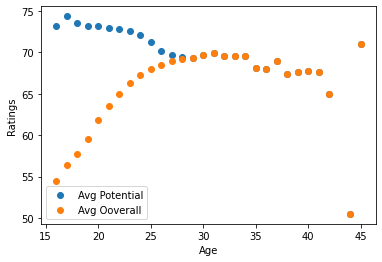

In [ ]:
# Plot the finding visually by having Age as the x-axis; the avg potential on age and the avg overall on age at y-axis.
data = df.groupby('Age').agg(mean('Potential').alias('Avg Potential'), mean('Overall').alias('Avg Overall')).orderBy('Age')
age = data.toPandas()['Age']
avg_pot = data.toPandas()['Avg Potential']
avg_ovr = data.toPandas()['Avg Overall']
plt.xlabel('Age')
plt.ylabel('Ratings')
plt.scatter(age, avg_pot, label='Avg Potential')
plt.scatter(age, avg_ovr, label='Avg Ooverall')
plt.legend()
plt.show()

In [ ]:
# Find the age when the players are fully released their potential in general?
data.filter(data['Avg Potential']==data['Avg Overall']).show()

+---+-----------------+-----------------+
|Age|    Avg Potential|      Avg Overall|
+---+-----------------+-----------------+
| 31|69.85007072135785|69.85007072135785|
| 32|69.52961672473867|69.52961672473867|
| 33|69.55882352941177|69.55882352941177|
| 34|69.53960396039604|69.53960396039604|
| 35|68.13265306122449|68.13265306122449|
| 36|67.93700787401575|67.93700787401575|
| 37| 68.9390243902439| 68.9390243902439|
| 38|67.37837837837837|67.37837837837837|
| 39|            67.64|            67.64|
| 40| 67.6923076923077| 67.6923076923077|
| 41|             67.6|             67.6|
| 42|             65.0|             65.0|
| 44|             50.5|             50.5|
| 45|             71.0|             71.0|
+---+-----------------+-----------------+



## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for exploring the player segmentation. 



### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and use the position attribute, ID attribute (for later processing) and skill-set attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



In [ ]:
# Your code to select relevant features and filter the data by removing the GK
df_filtered = df.select('ID','Position','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle').filter(df['Position']!='GK')
df_filtered.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+------

To make the later stage easier, we define the position group by using the position feature (attributes on Position).
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

In [ ]:
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD = ['RF','LF','LW','RS','RW','LS','CF','ST']
MID = ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

In [ ]:
reordered_cols = ['ID','Position','Position_Group','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
df_kmeans_new = df_filtered.withColumn(
    "Position_Group", when(col("Position").isin(DEF),'DEF')
    .when(col("Position").isin(FWD),'FWD')
    .when(col("Position").isin(MID),'MID')
    .otherwise(col("Position"))).select(reordered_cols)

### Show results
df_kmeans_new.show()

+------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Position|Position_Group|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+

Now, we remove the Position_Group and Position to create the feature for Kmeans




In [ ]:
features_kmeans = ['Height(CM)', 'Weight(KG)', 
                'Crossing', 'Finishing', 'HeadingAccuracy', 
                'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                'FKAccuracy', 'LongPassing', 'BallControl', 
                'Acceleration', 'SprintSpeed', 'Agility', 
                'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                'Stamina', 'Strength', 'LongShots', 'Aggression', 
                'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler_kmeans = VectorAssembler(inputCols=features_kmeans, outputCol="Features")
df_kmeans = vecAssembler_kmeans.transform(df_kmeans_new).select('ID','Features')
df_kmeans.show(3)

+------+--------------------+
|    ID|            Features|
+------+--------------------+
|158023|[173.736,72.12112...|
| 20801|[188.976,83.00733...|
|190871|[179.832,68.0388,...|
+------+--------------------+
only showing top 3 rows



Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



In [ ]:
euc_error = []
cos_error = []

for k in range(2,20):
    euc_kmeans_model = KMeans(featuresCol='Features', k=k, 
                    initMode='k-means||', initSteps=2, 
                    tol=0.0001, maxIter=20, seed=0, 
                    distanceMeasure='euclidean').fit(df_kmeans)
    cos_kmeans_model = KMeans(featuresCol='Features', k=k, 
                    initMode='k-means||', initSteps=2, 
                    tol=0.0001, maxIter=20, seed=0, 
                    distanceMeasure='cosine').fit(df_kmeans)
    euc_error.append(euc_kmeans_model.computeCost(df_kmeans))
    cos_error.append(cos_kmeans_model.computeCost(df_kmeans))

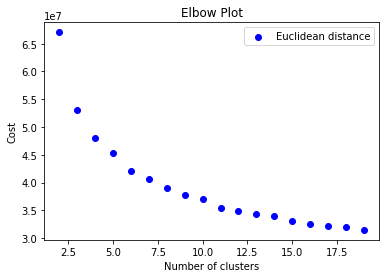

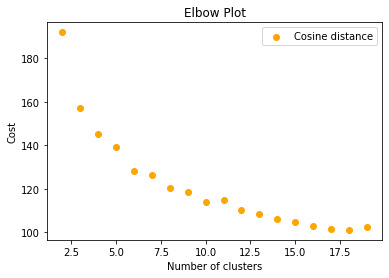

In [ ]:
plt.scatter(range(2,20), euc_error, color ='blue', label='Euclidean distance')
plt.legend()
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()
plt.scatter(range(2,20), cos_error, color ='orange', label='Cosine distance')
plt.legend()
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()


### 2.2 K-Means

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on each Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there relationship between Position_Group and a particular Cluster?</li>
    </ol>

</div>
</div>




In [ ]:
# Fitting with k = 8
kmeans_model = KMeans(featuresCol='Features', predictionCol='Prediction', k=8, 
                    initMode='k-means||', initSteps=2, 
                    tol=0.0001, maxIter=20, seed=0, 
                    distanceMeasure='euclidean').fit(df_kmeans)

# Get predicted cluster for each record, drop 'Features' then re-join with df_kmeans_new via 'ID'
df_kmeans_pred = kmeans_model.transform(df_kmeans).drop('Features').join(df_kmeans_new, 'ID')
df_kmeans_pred.show()

+------+----------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Prediction|Position|Position_Group|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+----------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+--

In [ ]:
# What you could find from those clusters (by cluster central point)?
centers = kmeans_model.clusterCenters()
clusters = pd.DataFrame(columns = features_kmeans, index = ['Cluster {}'.format(c) for c in range(8)])
for i in range(8):
  clusters.loc['Cluster {}'.format(i)] = centers[i]
print(clusters)

          Height(CM) Weight(KG) Crossing  ...  Marking StandingTackle SlidingTackle
Cluster 0     171.75    73.8135  69.9981  ...  62.4609        65.4501       61.7008
Cluster 1    185.943    80.2423   35.924  ...  63.7333         66.597        63.958
Cluster 2    174.929     74.354  39.3686  ...  25.6115        19.3744       18.2704
Cluster 3    171.649    72.4002  53.3579  ...  57.7181        60.9104       59.5224
Cluster 4    182.115    79.6965  51.3978  ...  31.7088        28.0576       24.1594
Cluster 5    175.202    75.2151  60.0128  ...  65.1756        67.7022        65.454
Cluster 6     170.28    70.8648  65.7271  ...  37.2889        34.5124       31.6224
Cluster 7    171.011    69.2166  54.2455  ...  37.2697        36.9118       36.1153

[8 rows x 31 columns]


+--------------+----+----+----+----+----+----+----+----+
|Position_Group|   0|   1|   2|   3|   4|   5|   6|   7|
+--------------+----+----+----+----+----+----+----+----+
|           DEF| 338|2291|   1|1642|   1|1565|   6|  22|
|           FWD|  82|   1|1074|  19|1138|  28| 713| 363|
|           MID|1263|  99| 133| 871| 123|1624|1337|1388|
+--------------+----+----+----+----+----+----+----+----+

+----------+-------------+--------------------+
|Prediction|Count for DEF|          Percentage|
+----------+-------------+--------------------+
|         1|         2291|  39.055574497101944|
|         3|         1642|   27.99181725196045|
|         5|         1565|  26.679168087282644|
|         0|          338|   5.762018411183089|
|         7|           22| 0.37504261847937265|
|         6|            6| 0.10228435049437436|
|         4|            1|0.017047391749062394|
|         2|            1|0.017047391749062394|
+----------+-------------+--------------------+



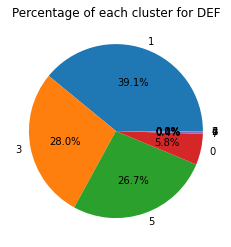

+----------+-------------+------------------+
|Prediction|Count for MID|        Percentage|
+----------+-------------+------------------+
|         5|         1624| 23.74963439602223|
|         7|         1388|20.298332845861363|
|         6|         1337|19.552500731207957|
|         0|         1263| 18.47031295700497|
|         3|          871|12.737642585551331|
|         2|          133|1.9450131617431996|
|         4|          123|1.7987715706346885|
|         1|           99|1.4477917519742616|
+----------+-------------+------------------+



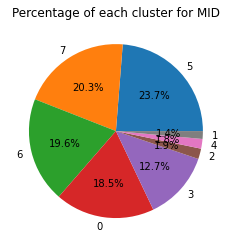

+----------+-------------+--------------------+
|Prediction|Count for FWD|          Percentage|
+----------+-------------+--------------------+
|         4|         1138|   33.29432416617905|
|         2|         1074|  31.421884142773553|
|         6|          713|  20.860152135751903|
|         7|          363|  10.620245757753072|
|         0|           82|   2.399063779988297|
|         5|           28|  0.8191925102399065|
|         3|           19|  0.5558806319485079|
|         1|            1|0.029256875365710942|
+----------+-------------+--------------------+



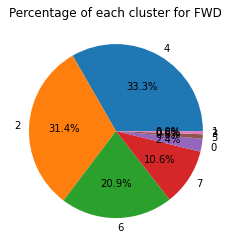

In [ ]:
# Is there relationship between Position_Group and a particular Cluster?
df_kmeans_pred.groupby('Position_Group').pivot('Prediction').agg(count('Prediction')).orderBy('Position_Group').show()
for group in ['DEF', 'MID','FWD']:
  pred_def = df_kmeans_pred.filter(col('Position_Group')==group) \
                          .groupby('Prediction').agg(count('Position_Group') \
                          .alias('Count for {}'.format(group))) \
                          .withColumn('Percentage', col('Count for {}'.format(group))/sum('Count for {}'.format(group)).over(Window.partitionBy())*100) \
                          .orderBy('Count for {}'.format(group), ascending=False)
  pred_def.show()
  plt.pie(pred_def.toPandas()['Percentage'], labels = pred_def.toPandas()['Prediction'], autopct='%1.1f%%')
  plt.title('Percentage of each cluster for {}'.format(group))
  plt.show()

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skill set values to segment the players into 8 clusters. Now we want to see whether we could accurately predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and only use the skill set features and the cluster results from Kmeans as the input (you need to create a column for your cluster results and name it as Cluster) for the model. Your target for classification is "Position_Group".

In [ ]:
# Rename prediction column
df_class_new = df_kmeans_pred.withColumnRenamed("Prediction","Cluster")
df_class_new.show()

+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Cluster|Position|Position_Group|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+-

In [ ]:
# Feature columns for classification task
features_class = ['Height(CM)', 'Weight(KG)', 
                  'Crossing', 'Finishing', 'HeadingAccuracy', 
                  'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                  'FKAccuracy', 'LongPassing', 'BallControl', 
                  'Acceleration', 'SprintSpeed', 'Agility', 
                  'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                  'Stamina', 'Strength', 'LongShots', 'Aggression', 
                  'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                  'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']

vecAssembler_class = VectorAssembler(inputCols=features_class, outputCol="Features")
df_class = vecAssembler_class.transform(df_class_new).select('ID','Features','Position_Group')
df_class.show(5)

+------+--------------------+--------------+
|    ID|            Features|Position_Group|
+------+--------------------+--------------+
|158023|[173.736,72.12112...|           FWD|
| 20801|[188.976,83.00733...|           FWD|
|190871|[179.832,68.0388,...|           FWD|
|192985|[155.7528,69.8531...|           MID|
|183277|[176.784,73.93549...|           FWD|
+------+--------------------+--------------+
only showing top 5 rows



In many data science modelling work, feature scaling is very important.
In here, we use standard scaling on the features.

In [ ]:
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
raw_data = standardscaler.fit(df_class).transform(df_class).drop('Features')
raw_data.show(5)

+------+--------------+--------------------+
|    ID|Position_Group|     Scaled_Features|
+------+--------------+--------------------+
|158023|           FWD|[12.9261363965246...|
| 20801|           FWD|[14.0600080102548...|
|190871|           FWD|[13.3796850420167...|
|192985|           MID|[11.5881678923229...|
|183277|           FWD|[13.1529107192706...|
+------+--------------+--------------------+
only showing top 5 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

In [ ]:
class_data = raw_data.withColumn('Target', when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2)).drop('Position_Group')
class_data.show(5)

+------+--------------------+------+
|    ID|     Scaled_Features|Target|
+------+--------------------+------+
|158023|[12.9261363965246...|     0|
| 20801|[14.0600080102548...|     0|
|190871|[13.3796850420167...|     0|
|192985|[11.5881678923229...|     2|
|183277|[13.1529107192706...|     0|
+------+--------------------+------+
only showing top 5 rows



### 3.2 Training Test Evaluation

We remove the feature of position and use all other skill set features and the cluster results as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

In [ ]:
train, test = class_data.randomSplit([0.8, 0.2], seed=12)

In [ ]:
# Define Logistic Regression classifier
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_Features", predictionCol="Prediction")
lr_model = lr.fit(train)

# Evaluate in test set, join the predictions back to the original dataset
test_pred = lr_model.transform(test).select('ID','Prediction', 'Target').join(df_class_new,'ID')
test_pred.show(10)

+------+----------+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Prediction|Target|Cluster|Position|Position_Group|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+----------+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+


****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




In [ ]:
# 1.The confusion matrix
print(confusion_matrix(test_pred.select("Target").collect(),test_pred.select("Prediction").collect()))

[[ 525    0  148]
 [   0 1076   84]
 [  94   90 1182]]


In [ ]:
# 2.The Precision, Recall and F1 score
print(classification_report(test_pred.select("Target").collect(), test_pred.select("Prediction").collect()))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       673
           1       0.92      0.93      0.93      1160
           2       0.84      0.87      0.85      1366

    accuracy                           0.87      3199
   macro avg       0.87      0.86      0.86      3199
weighted avg       0.87      0.87      0.87      3199



### 3.3 K-fold Cross-Validation

We surely missed something during the modelling work -- Hyper-parameter tuning! We can use K-fold cross validation to find out the best hyper-parameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for two (any two) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyper-parameters based on this cross-validation results</li>
        <li> Any difficulties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



##### CV classification models

In [ ]:
# 1. Your code design and running results
# 2. Your findings on hyper-parameters based on this cross-validation results
# Re-setup data to make use of Pipeline
df_pipeline = df_kmeans_pred.withColumnRenamed("Prediction","Cluster")\
                            .withColumn('Target', when(col("Position_Group") == "DEF", 1)
                            .when(col("Position_Group")== "FWD", 0)
                            .otherwise(2)).drop('Position_Group')

df_train, df_test = df_pipeline.randomSplit([0.8, 0.2], seed=12)

# Define pipeline stage 1: VectorAssembler
vecAssembler_class = VectorAssembler(inputCols=features_class, outputCol="Features")

# Define pipeline stage 2: StandardScaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")

# Define pipeline stage 3: Classifier
dt = DecisionTreeClassifier(labelCol="Target", featuresCol="Scaled_Features")
rf = RandomForestClassifier(labelCol="Target", featuresCol="Scaled_Features")
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_Features")

# Setup pipelines
dt_pipeline = Pipeline(stages=[vecAssembler_class, standardscaler, dt])
rf_pipeline = Pipeline(stages=[vecAssembler_class, standardscaler, rf])
lr_pipeline = Pipeline(stages=[vecAssembler_class, standardscaler, lr])
pipelines = [dt_pipeline, rf_pipeline, lr_pipeline]

# Set of ParamMaps
dt_paramGrid = (ParamGridBuilder().addGrid(dt.maxDepth, [2, 4, 6, 8, 10])
                                .addGrid(dt.maxBins, [10, 20, 40, 60, 80])
                                .build())
rf_paramGrid = (ParamGridBuilder().addGrid(rf.numTrees, [100, 200, 300, 400])
                                .addGrid(rf.maxDepth, [4, 5, 6, 7])
                                .addGrid(rf.maxBins, [32, 64, 128])
                                .build())
lr_paramGrid = (ParamGridBuilder().addGrid(lr.regParam, [1e-3, 1e-4])
                                .addGrid(lr.maxIter, [1, 10, 100, 1000])
                                .addGrid(lr.elasticNetParam, [0, 0.15, 0.5, 0.7, 1])                                        
                                .build())
paramGrids = [dt_paramGrid, rf_paramGrid, lr_paramGrid]

# Set up the Evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Target")

# Training loop
names = ['DecisionTreeClassifier best model:', 'RandomForestClassifier best model:', 'LogisticRegression best model:']
for pl, pg, name in zip(pipelines, paramGrids, names):
  print(name)
  # Compile CrossValidator
  crossval = CrossValidator(estimator=pl,
                            estimatorParamMaps=pg,
                            evaluator=evaluator,
                            numFolds=3)
  
  # Train model
  cvModel = crossval.fit(df_train)
  bestmodel = cvModel.bestModel.stages[-1]._java_obj
  print({param.name: bestmodel.getOrDefault(bestmodel.getParam(param.name)) for param in pg[0]})  
  
  # Evaluate df_test, join the predictions back to the original dataset
  test_pred = cvModel.bestModel.transform(df_test).select('ID', 'Prediction', 'Target').join(df_class_new,'ID')
  print('\n')
  test_pred.show(10)

  # Evaluation results on df_test
  print('Confusion matrix:')
  print(confusion_matrix(test_pred.select("Target").collect(),
                         test_pred.select("Prediction").collect()))
  print('Classification report:')
  print(classification_report(test_pred.select("Target").collect(), 
                              test_pred.select("Prediction").collect()))

DecisionTreeClassifier best model:
{'maxDepth': 8, 'maxBins': 60}


+------+----------+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+
|    ID|Prediction|Target|Cluster|Position|Position_Group|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|
+------+----------+------+-------+--------+--------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------

#####Linear regression models

In [ ]:
# 4. Any other possible tasks we could do on this dataset: 
# Linear Regression to predict Value(M) using skillset features
# Convert value(M) from string into int
df_new = df.withColumn("value(M)", df["value(M)"].cast(IntegerType()))

# Filter data from df: Value as target and other features
df_reg = df_new.select('ID', 'value(M)', 'wage(K)', 'Overall', 'Age', 'Potential','Position','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')\
                      .filter(df['Position']!='GK')\
                      .withColumn("Position_Group", when(col("Position").isin(DEF), 1)
                      .when(col("Position").isin(FWD), 0)
                      .when(col("Position").isin(MID), 2))\
                      .drop("Position").fillna({'value(M)': 0, 'wage(K)': 0})

# Preprocess data
features_reg = ['wage(K)', 'Overall', 'Age', 'Potential','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', "Position_Group"]

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols=features_reg, outputCol="Features")
df_reg = vecAssembler_class.transform(df_reg)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_reg = standardscaler.fit(df_reg).transform(df_reg)

# split train, test sets
train_reg, test_reg = df_reg.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="Scaled_Features", 
                      labelCol='value(M)', predictionCol = 'predicted_value(M)')
# Fit the model
lrModel = lr.fit(train_reg)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred = lrModel.transform(test_reg).select('ID', 'predicted_value(M)').join(df_reg,'ID')
y_pred.show(10)

Coefficients: [3.931365520565675,0.41843447454122695,0.0,0.7633598632449116,0.0,0.0,0.0,0.040908306761217934,0.0,0.0,0.014838517815631447,0.0,0.0,0.0,0.0,0.0,0.016674811759682648,0.0,0.0,0.18856849963987335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008366813201395889,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: -14.33970583896424
RMSE: 2.805326
r2: 0.768360
+------+------------------+--------+-------+-------+---+---------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+--------------------+--------------------+
|    ID|predicted_value(M)|value(M)|wage(K)|Overall|Age|Potential|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Accelera

In [ ]:
# Introduce categorical features and additional numerical features
features = ['ID','value(M)','Age','Overall','Potential','wage(K)','Special','Preferred Foot',
            'International Reputation','Weak Foot','Skill Moves','Work Rate','Position','Jersey Number',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_ = df.select(features).withColumn('value(M)', df['value(M)'].cast(IntegerType())).dropna()

# Preprocess numerical features
num_features = ['Age','Overall','Potential','wage(K)','Special','International Reputation','Weak Foot','Skill Moves',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_num = df_.select('ID', *num_features).withColumn('Release Clause(M)', df['Release Clause(M)'].cast(IntegerType()))

# Preprocess categorical features
cat_features = ['Preferred Foot','Work Rate','Position']
df_cat = df_.select('ID', *cat_features)

# One hot encoding categorical features
new_cat = []
for cat in cat_features:
  cat_rdd = df_cat.select(cat).distinct().rdd.flatMap(lambda x: x).collect()
  cat_expr = [when(col(cat) == val, 1).otherwise(0).alias("{}_{}".format(cat,val)) for val in cat_rdd]
  for each in cat_expr:
    new_cat.append(each)

# New dataframe
df_new_cat = df_cat.select('ID', *new_cat)
df_all_num = df_new_cat.join(df_num, 'ID')
df_label = df_all_num.join(df_.select('ID','value(M)'), 'ID')

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols = df_all_num.columns[1:], outputCol="Features")
df_label = vecAssembler_class.transform(df_label)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_label = standardscaler.fit(df_label).transform(df_label)

# split train, test sets
train_, test_ = df_label.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="Scaled_Features", 
                      labelCol='value(M)', predictionCol= 'predicted_value(M)')
# Fit the model
lrModel = lr.fit(train_)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred_ = lrModel.transform(test_).select('ID', 'predicted_value(M)').join(df_,'ID')
y_pred_.show(10)

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4960847677646367,0.0,0.5565795928066789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.75761668121148]
Intercept: -7.549319356668567
RMSE: 1.262327
r2: 0.978354
+------+------------------+--------+---+-------+---------+-------+-------+--------------+------------------------+---------+-----------+--------------+--------+-------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+----------+---------+-------------+-------

In [ ]:
# Introduce categorical features, additional numerical features and apply PCA to reduce dimension
features = ['ID','value(M)','Age','Overall','Potential','wage(K)','Special','Preferred Foot',
            'International Reputation','Weak Foot','Skill Moves','Work Rate','Position','Jersey Number',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_ = df.select(features).withColumn('value(M)', df['value(M)'].cast(IntegerType())).dropna()

# Preprocess numerical features
num_features = ['Age','Overall','Potential','wage(K)','Special','International Reputation','Weak Foot','Skill Moves',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_num = df_.select('ID', *num_features).withColumn('Release Clause(M)', df['Release Clause(M)'].cast(IntegerType()))

# Preprocess categorical features
cat_features = ['Preferred Foot','Work Rate','Position']
df_cat = df_.select('ID', *cat_features)

# One hot encoding categorical features
new_cat = []
for cat in cat_features:
  cat_rdd = df_cat.select(cat).distinct().rdd.flatMap(lambda x: x).collect()
  cat_expr = [when(col(cat) == val, 1).otherwise(0).alias("{}_{}".format(cat,val)) for val in cat_rdd]
  for each in cat_expr:
    new_cat.append(each)

# New dataframe
df_new_cat = df_cat.select('ID', *new_cat)
df_all_num = df_new_cat.join(df_num, 'ID')
df_label = df_all_num.join(df_.select('ID','value(M)'), 'ID')

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols = df_all_num.columns[1:], outputCol="Features")
df_label = vecAssembler_class.transform(df_label)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_label = standardscaler.fit(df_label).transform(df_label)

# Dimension reduction
pca = PCA(k=60, inputCol="Scaled_Features", outputCol="pcaFeatures")
df_label_pca = pca.fit(df_label).transform(df_label)

# split train, test sets
train_pca, test_pca = df_label_pca.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="pcaFeatures", 
                      labelCol='value(M)', predictionCol= 'predicted_value(M)')
# Fit the model
lrModel = lr.fit(train_pca)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred_pca = lrModel.transform(test_pca).select('ID', 'predicted_value(M)').join(df_,'ID')
y_pred_pca.show(10)

Coefficients: [-0.3839469167074175,0.0,-2.9538235265218202,0.19016446857928176,1.3767700969845202,0.39462271866060605,-1.228104962094442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.10597320314628732,0.0,0.0,0.0,0.0,0.0,0.21972798804834984,-0.05384838038315503,-0.21838763907858644,0.9241310423791822,0.7406914304756788,1.197128725742926,1.3064927150961725,0.9731478118029567,0.0,0.0,0.0,0.0,0.10851517919308032,-0.035641790452933815,0.0,0.0,0.0,0.0,0.1436764151132239,0.0,-0.8599526164756414,0.37833518745545947]
Intercept: -48.307705111779036
RMSE: 2.516382
r2: 0.913981
+------+-------------------+--------+---+-------+---------+-------+-------+--------------+------------------------+---------+-----------+--------------+--------+-------------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-----

In [ ]:
# Linear Regression to predict Wage(K) using skillset features
# Convert value(M) from string into int
df_new = df.withColumn("value(M)", df["value(M)"].cast(IntegerType()))
# Filter data from df: Value as target and other features
df_reg = df_new.select('ID', 'wage(K)', 'value(M)', 'Overall', 'Age', 'Potential','Position','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle')\
                      .filter(df['Position']!='GK')\
                      .withColumn("Position_Group", when(col("Position").isin(DEF), 1)
                      .when(col("Position").isin(FWD), 0)
                      .when(col("Position").isin(MID), 2))\
                      .drop("Position").fillna({'value(M)': 0, 'wage(K)': 0})

# Preprocess data
features_reg = ['value(M)', 'Overall', 'Age', 'Potential','Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', "Position_Group"]

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols=features_reg, outputCol="Features")
df_reg = vecAssembler_class.transform(df_reg)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_reg = standardscaler.fit(df_reg).transform(df_reg)

# split train, test sets
train_reg, test_reg = df_reg.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="Scaled_Features",
                      labelCol='wage(K)', predictionCol= 'predicted_wage(K)')
# Fit the model
lrModel = lr.fit(train_reg)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred = lrModel.transform(test_reg).select('ID', 'predicted_wage(K)').join(df_reg,'ID')
y_pred.show(10)

Coefficients: [18.516880639809752,0.0,1.880582255525497,0.5634058051976713,0.0,-0.0,0.12839535524176113,0.0,0.044396763070164574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.28998488005547873,0.0,0.0,0.0,0.02150586946445526,0.0,0.0,0.06466141297398753,0.0,0.0,0.14351076748720648,0.3253570657751829,-0.2908865428413873]
Intercept: -13.827900631759217
RMSE: 11.668441
r2: 0.738756
+------+------------------+-------+--------+-------+---+---------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+--------------------+--------------------+
|    ID| predicted_wage(K)|wage(K)|value(M)|Overall|Age|Potential|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Cu

In [ ]:
# Introduce categorical features and additional numerical features
features = ['ID','wage(K)','Age','Overall','Potential','value(M)','Special','Preferred Foot',
            'International Reputation','Weak Foot','Skill Moves','Work Rate','Position','Jersey Number',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_ = df.select(features).withColumn('value(M)', df['value(M)'].cast(IntegerType())).dropna()

cat_features = ['Preferred Foot','Work Rate','Position']
df_cat = df_.select('ID', *cat_features)

num_features = ['Age','Overall','Potential','value(M)','Special','International Reputation','Weak Foot','Skill Moves',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_num = df_.select('ID', *num_features).withColumn('Release Clause(M)', df['Release Clause(M)'].cast(IntegerType()))

new_cat = []
for cat in cat_features:
  cat_rdd = df_cat.select(cat).distinct().rdd.flatMap(lambda x: x).collect()
  cat_expr = [when(col(cat) == val, 1).otherwise(0).alias("{}_{}".format(cat,val)) for val in cat_rdd]
  for each in cat_expr:
    new_cat.append(each)

df_new_cat = df_cat.select('ID', *new_cat)
df_all_num = df_new_cat.join(df_num, 'ID')
df_label = df_all_num.join(df_.select('ID','wage(K)'), 'ID')

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols = df_all_num.columns[1:], outputCol="Features")
df_label = vecAssembler_class.transform(df_label)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_label = standardscaler.fit(df_label).transform(df_label)

# split train, test sets
train_, test_ = df_label.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="Scaled_Features", 
                      labelCol='wage(K)', predictionCol= 'predicted_wage(K)')
# Fit the model
lrModel = lr.fit(train_)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred_ = lrModel.transform(test_).select('ID', 'predicted_wage(K)').join(df_,'ID')
y_pred_.show(10)

Coefficients: [0.0,0.0,-0.45260755119759893,0.0,0.16209311619376496,0.8369695720031034,0.0,0.0,-0.008357108923960715,-0.027881392895402805,0.0,0.5165125912314036,0.0,-0.4213221027002025,-0.03913975980938682,0.0,-0.0866027349352489,-0.3062657254486045,0.0,0.7220859751100925,0.3230873245168251,-0.15045679207389648,-0.15523437919490993,0.8069366968799075,-0.18511531075945828,-0.4089575905049009,0.32438961855764653,0.6441930389210582,0.0820336851293629,0.09435829639729976,-0.6717798871083068,0.5046221676701317,0.0,-0.02988968327502605,0.0,0.0,-0.16369507642690773,0.3216538619059664,1.5171765598343507,0.6400740971474937,-1.1618280615727326,11.837429063177447,0.00022190398757923976,6.827718029671133,0.0,-0.46602749776601077,0.03628597212247689,0.0,0.055729695935599115,0.0,-0.0,-0.0,-0.0,0.019425673217371726,0.0,-0.0,0.0,0.13026803661164799,-0.13119268631715794,-0.1637388699201774,0.0,-0.7128257942548566,0.0402784203080082,0.033582343592646405,0.0,0.0,0.0,0.007235106695439844,0.02222638037450

In [ ]:
# Introduce categorical features, additional numerical features and apply PCA to reduce dimension
features = ['ID','wage(K)','Age','Overall','Potential','value(M)','Special','Preferred Foot',
            'International Reputation','Weak Foot','Skill Moves','Work Rate','Position','Jersey Number',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_ = df.select(features).withColumn('value(M)', df['value(M)'].cast(IntegerType())).dropna()

cat_features = ['Preferred Foot','Work Rate','Position']
df_cat = df_.select('ID', *cat_features)

num_features = ['Age','Overall','Potential','value(M)','Special','International Reputation','Weak Foot','Skill Moves',
            'Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling',
            'Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions',
            'Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning',
            'Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking',
            'GKPositioning','GKReflexes', 'Release Clause(M)']
df_num = df_.select('ID', *num_features).withColumn('Release Clause(M)', df['Release Clause(M)'].cast(IntegerType()))

new_cat = []
for cat in cat_features:
  cat_rdd = df_cat.select(cat).distinct().rdd.flatMap(lambda x: x).collect()
  cat_expr = [when(col(cat) == val, 1).otherwise(0).alias("{}_{}".format(cat,val)) for val in cat_rdd]
  for each in cat_expr:
    new_cat.append(each)

df_new_cat = df_cat.select('ID', *new_cat)
df_all_num = df_new_cat.join(df_num, 'ID')
df_label = df_all_num.join(df_.select('ID','wage(K)'), 'ID')

# Vector assembler
vecAssembler_class = VectorAssembler(inputCols = df_all_num.columns[1:], outputCol="Features")
df_label = vecAssembler_class.transform(df_label)

# Standard scaler
standardscaler = StandardScaler(inputCol="Features", outputCol="Scaled_Features")
df_label = standardscaler.fit(df_label).transform(df_label)

pca = PCA(k=60, inputCol="Scaled_Features", outputCol="pcaFeatures")
df_label_pca = pca.fit(df_label).transform(df_label)

# split train, test sets
train_reg_pca, test_reg_pca = df_label_pca.randomSplit([0.8, 0.2], seed=12)

lr = LinearRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, featuresCol="pcaFeatures", 
                      labelCol='wage(K)', predictionCol= 'predicted_wage(K)')
# Fit the model
lrModel = lr.fit(train_reg_pca)

# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lrModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

y_pred_pca = lrModel.transform(test_reg_pca).select('ID', 'predicted_wage(K)').join(df_,'ID')
y_pred_pca.show(10)

Coefficients: [-1.4378978344473783,-0.6599155576205923,-10.619436291801089,0.3895271530367163,3.7718168552388978,1.0604912932274866,-2.0640759095509376,-1.2172834461819892,0.0,-0.7103389613488656,-0.6816497622584815,0.0,0.0,-0.8199866879260523,-0.26686814937908254,-0.04019465533942254,-0.11111481390613638,-0.7241433345372631,-0.6279630407105808,0.6838346482223366,0.034548937774396965,0.0,0.0,0.0,-0.3290208658133124,-0.30450626519729956,0.0,0.0,0.4037332806491868,0.5631012235352341,-0.2028650042473649,0.0,-0.7531111610108383,-0.07965062604026991,0.2150416814304403,0.39463661903975394,0.09860279048760291,0.6206084250970096,2.249456020556557,0.0,-0.5074973503796464,5.4016310456384815,7.985385639131168,3.989388661280062,5.055561421251884,5.236285283148949,1.5390671553122834,-0.134059826785574,0.0,2.318093846436642,1.0884367753379087,2.521267140578437,-2.055242029354699,-0.6733267944515375,1.230582946596451,-0.7164508858986761,-1.1648904973024832,0.0,0.6086306081594485,0.859164673938717]
In